<a href="https://colab.research.google.com/github/patakrob/scrape/blob/main/O'Reilly_Class_Standard_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard Linear Regression: The Market Model

---


An asset's Market Model (MM) is a time series regression of the the realized excess returns of the asset against the realized excess returns of the market. Excess returns are defined as returns in excess of some benchmark such as the risk-free rate on a US treasury bill or note. A security's MM is formulated as:


**(R - F) = 𝛂 + 𝛃 (M - F) + 𝛔**

Y = (R - F) is the outcome/dependent variable,  X = (M - F) is the predictor/independent variable, R is the realized return of a stock, F is the return on a risk-free asset (US treasury bill) , M is the realized return of a market portfolio (S&P 500), 𝛼 (alpha) is the expected stock-specific return, 𝛽 (beta) is the level of systematic risk exposure to the market, 𝛔 (sigma) is the unexpected stock-specific return



Note that an asset's MM is different from its Captial Asset Pricing Model (CAPM). Unlike the CAPM, an asset's MM has both an idiosyncratic risk term 𝛼 and an error term 𝛔 in its formulation. However, the systematic risk term beta of the asset is the same as the one calculated using the CAPM. The expected value of 𝛔 is zero. That is the reason it does not appear in the CAPM which formulates expected returns.

According to the CAPM, which subscribes to the efficient market hypothesis, the intercept, or 𝛼, of an asset's MM has an expected value of zero. According to the CAPM, an asset's realized postive/(negative) 𝛼 shows that the market participants under priced/(overpiced) the security during the holding period.



# Import your data

We use the following free data sources to get the daily closing prices of various assets:

Risk free rate: https://fred.stlouisfed.org/series/DTB4WK

Stock and market data: https://finance.yahoo.com

In [ ]:
!pip install yfinance

import statsmodels.api as sm
import pandas_datareader.data as pdr
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime

In [ ]:
start = datetime(2017, 11, 4)
end = datetime(2021, 11, 3)

riskfree_rate = pdr.DataReader('TB4WK', 'fred', start, end)
market = yf.Ticker('SPY').history(start=start, end=end)
stock = yf.Ticker('AAPL').history(start=start, end=end)

# Explore your data

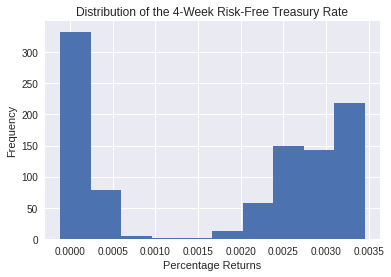

Descriptive Stastics of the Daily 4-Week Risk-Free Treasury Rate:
count    999.000000
mean       0.001761
std        0.001373
min       -0.000113
25%        0.000214
50%        0.002515
75%        0.003028
max        0.003454
Name: DTB4WK, dtype: float64


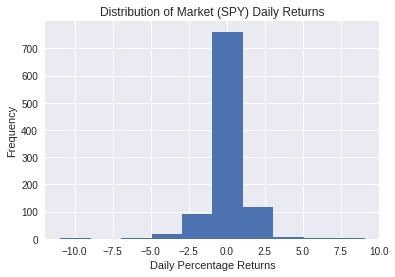

Descriptive Stastics of the Market's daily percentage returns:
count    1004.000000
mean        0.073281
std         1.301129
min       -10.942353
25%        -0.357552
50%         0.121783
75%         0.663065
max         9.060316
Name: Close, dtype: float64


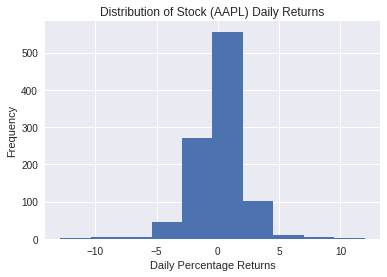

Descriptive stastics of Apple stock's percentage returns:
count    1004.000000
mean        0.149042
std         2.055694
min       -12.864705
25%        -0.772152
50%         0.124413
75%         1.195031
max        11.980845
Name: Close, dtype: float64


In [ ]:
riskfree_rate = pdr.DataReader('DTB4WK', 'fred', start, end)
riskfree_rate = riskfree_rate.dropna()
daily_riskfree_rate = (1 + riskfree_rate['DTB4WK']) ** (1/360) - 1 #Daily rate based on 360 days for the calendar year
plt.hist(daily_riskfree_rate), plt.title('Distribution of the 4-Week Risk-Free Treasury Rate'), plt.xlabel('Percentage Returns'), plt.ylabel('Frequency'), plt.show()
print("Descriptive Stastics of the Daily 4-Week Risk-Free Treasury Rate:\n{}".format(daily_riskfree_rate.describe()))

market_return = market['Close'].pct_change(1)*100
market_return = market_return.dropna()
plt.hist(market_return), plt.title('Distribution of Market (SPY) Daily Returns'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show()
print("Descriptive Stastics of the Market's daily percentage returns:\n{}".format(market_return.describe()))

stock_return = stock['Close'].pct_change(1)*100
stock_return = stock_return.dropna()
plt.hist(stock_return), plt.title('Distribution of Stock (AAPL) Daily Returns'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show()
print("Descriptive stastics of Apple stock's percentage returns:\n{}".format(stock_return.describe()))

# Build your linear regression model

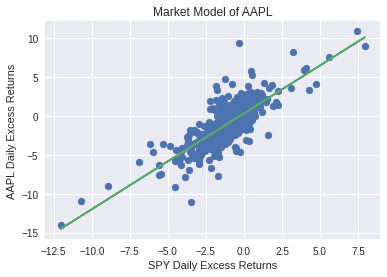

According to AAPL's Market Model, the security had a realized Alpha of 0.32% and Beta of 1.23


In [ ]:
#AAPL's Market Model
y = stock_return - riskfree_rate['DTB4WK'].mean()
x = market_return - riskfree_rate['DTB4WK'].mean()
plt.scatter(x,y)
x = sm.add_constant(x)
market_model = sm.OLS(y, x).fit()
plt.plot(x, x*market_model.params[1]+market_model.params[0])
plt.title('Market Model of AAPL'), plt.xlabel('SPY Daily Excess Returns'), plt.ylabel('AAPL Daily Excess Returns'), plt.show();
print("According to AAPL's Market Model, the security had a realized Alpha of {0}% and Beta of {1}".format(round(market_model.params[0],2), round(market_model.params[1],2)))

# Analyze your results

In [ ]:
print("The Market Model of AAPL is summarized below:\n{}".format(market_model.summary()));

The Market Model of AAPL is summarized below:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1552.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          8.22e-206
Time:                        03:54:27   Log-Likelihood:                -1677.9
No. Observations:                1004   AIC:                             3360.
Df Residuals:                    1002   BIC:                             3370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

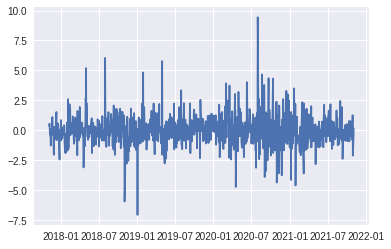

In [ ]:
plt.plot(market_model.resid);